In [8]:
import json
import numpy as np
from IPython.display import Image
import boto3
runtime = boto3.Session().client(service_name='runtime.sagemaker') 

object_categories = ['bottle', 'cardboard','coffee_cup','glass', 'plastic', 'plastic_bag', 'soda_can', 'trash']
endpoint_name = 'trashnet-imagenet-new'

image_list = {
#     "bottle" : "https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/samples/wb.jpg",
#               "cardboard": "http://www.toyhalloffame.org/sites/www.toyhalloffame.org/files/toys/square/cardboard-box-square.jpg",
#               "coffee_cup": "https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/samples/part0.jpg",
#               "glass": "http://farm3.static.flickr.com/2146/2503344744_9d65322922.jpg",
#               "plastic": "http://farm1.static.flickr.com/45/105983430_a0d3326d20.jpg",
#               "plastic_bag": "http://farm3.static.flickr.com/2089/2352391295_422eeec9bc.jpg",
#               "soda_can" : "https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/samples/can.jpg",
              "trash" : "https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/samples/trash/trash112.jpg"}

for image_category, image_category_file_path in image_list.items():
    print(image_category_file_path)
    !wget -O /tmp/test.jpg $image_category_file_path
    file_name = '/tmp/test.jpg'
    
    with open(file_name, 'rb') as f:
        payload = f.read()
        payload = bytearray(payload)
    response = runtime.invoke_endpoint(EndpointName=endpoint_name, 
                                       ContentType='application/x-image', 
                                       Body=payload)
    result = response['Body'].read()
    # result will be in json format and convert it to ndarray
    result = json.loads(result)
    print ("-------------\n")
    print ("Category input - {}\n".format(image_category))
    print ("Results: {} \n".format(result))
    index = np.argmax(result)
    print("Resulting label : {} , probability : {} ".format(object_categories[index],str(result[index])))
    print ("-------------")

https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/samples/trash/trash112.jpg
--2018-11-26 05:45:41--  https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/samples/trash/trash112.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.137.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.137.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24468 (24K) [image/jpeg]
Saving to: ‘/tmp/test.jpg’

/tmp/test.jpg       100%[===================>]  23.89K  --.-KB/s    in 0.001s  

2018-11-26 05:45:41 (34.5 MB/s) - ‘/tmp/test.jpg’ saved [24468/24468]

-------------

Category input - trash

Results: [3.3762409534787707e-10, 8.466202738866002e-10, 0.02539648301899433, 0.0010381086030974984, 0.005021736491471529, 1.2342039716617403e-11, 1.5391377061746425e-08, 0.9685436487197876] 

Resulting label : trash , probability : 0.9685436487197876 
-------------


--2018-11-27 05:43:03--  https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/images/2018-11-27-deeplens_1543297097.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.229.93
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.229.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 880131 (860K) [binary/octet-stream]
Saving to: ‘/tmp/test.jpg’

/tmp/test.jpg       100%[===================>] 859.50K  --.-KB/s    in 0.03s   

2018-11-27 05:43:03 (26.9 MB/s) - ‘/tmp/test.jpg’ saved [880131/880131]



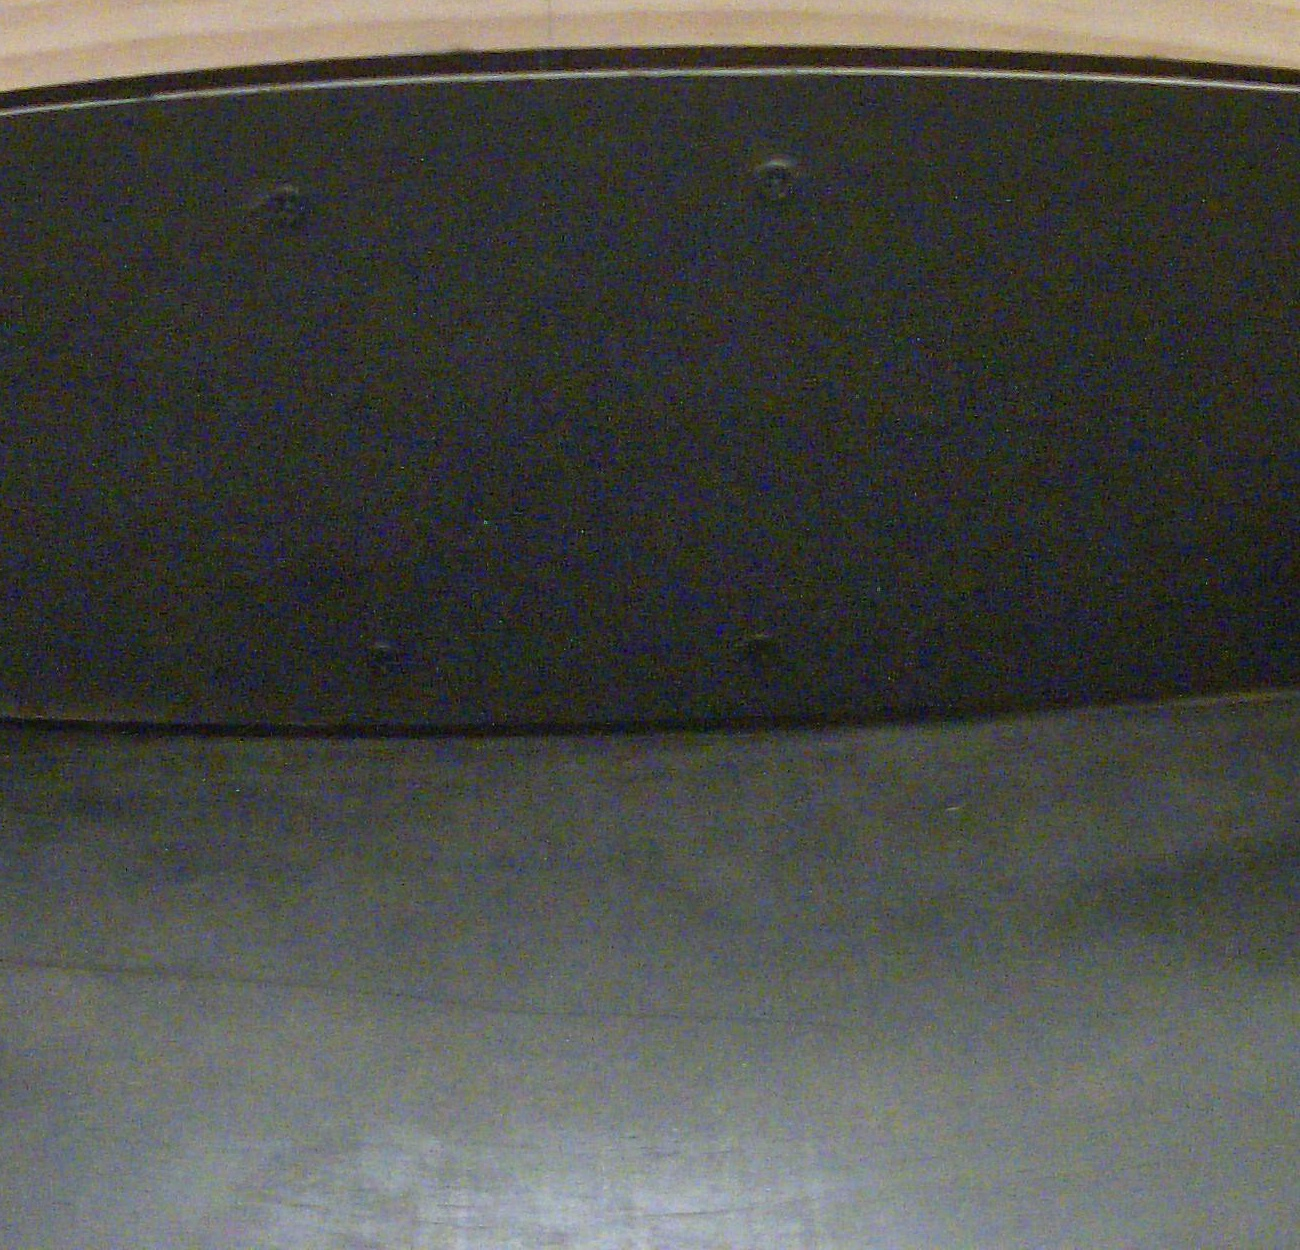

In [28]:
image_category_file_path = 'https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/images/2018-11-27-deeplens_1543297097.jpg'
!wget -O /tmp/test.jpg $image_category_file_path
file_name = '/tmp/test.jpg'
# test image
import cv2
img = cv2.imread(file_name)
crop_img = img[270:3000, 700:2000]
cv2.imwrite(file_name, crop_img)
# cv2.imshow("cropped", crop_img)
# cv2.waitKey(0)
from IPython.display import Image
Image(file_name)

In [12]:
import json
import numpy as np
from IPython.display import Image
import boto3
runtime = boto3.Session().client(service_name='runtime.sagemaker') 

object_categories = ['bottle', 'cardboard','coffee_cup','glass', 'plastic', 'plastic_bag', 'soda_can', 'trash']
endpoint_name = 'trashnet-imagenet-new'

image_list = {
#     "bottle" : "https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/samples/wb.jpg",
#               "cardboard": "http://www.toyhalloffame.org/sites/www.toyhalloffame.org/files/toys/square/cardboard-box-square.jpg",
#               "coffee_cup": "https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/samples/part0.jpg",
#               "glass": "http://farm3.static.flickr.com/2146/2503344744_9d65322922.jpg",
#               "plastic": "http://farm1.static.flickr.com/45/105983430_a0d3326d20.jpg",
#               "plastic_bag": "http://farm3.static.flickr.com/2089/2352391295_422eeec9bc.jpg",
#               "soda_can" : "https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/samples/can.jpg",
              "trash" : "https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/images/2018-11-27-deeplens_1543295814.jpg"}

for image_category, image_category_file_path in image_list.items():
    print(image_category_file_path)
    !wget -O /tmp/test.jpg $image_category_file_path
    file_name = '/tmp/test.jpg'
    
    with open(file_name, 'rb') as f:
        payload = f.read()
        payload = bytearray(payload)
    response = runtime.invoke_endpoint(EndpointName=endpoint_name, 
                                       ContentType='application/x-image', 
                                       Body=payload)
    result = response['Body'].read()
    # result will be in json format and convert it to ndarray
    result = json.loads(result)
    print ("-------------\n")
    print ("Category input - {}\n".format(image_category))
    print ("Results: {} \n".format(result))
    index = np.argmax(result)
    print("Resulting label : {} , probability : {} ".format(object_categories[index],str(result[index])))
    print ("-------------")

https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/images/2018-11-27-deeplens_1543295814.jpg
--2018-11-27 05:22:22--  https://s3.amazonaws.com/reinvent2018-recycle-arm-us-east-1/images/2018-11-27-deeplens_1543295814.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.224.243
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.224.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 833423 (814K) [binary/octet-stream]
Saving to: ‘/tmp/test.jpg’

/tmp/test.jpg       100%[===================>] 813.89K  --.-KB/s    in 0.03s   

2018-11-27 05:22:23 (27.1 MB/s) - ‘/tmp/test.jpg’ saved [833423/833423]

-------------

Category input - trash

Results: [0.7889397144317627, 0.13100408017635345, 0.022924993187189102, 0.007253189571201801, 0.046035077422857285, 0.0006467601633630693, 0.00023126829182729125, 0.0029649948701262474] 

Resulting label : bottle , probability : 0.7889397144317627 
-------------
